In [69]:
# Install required packages
!pip install dgl

# Load necessary packages
import dgl
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [70]:
# Load dataset

# https://paperswithcode.com/dataset/amazon-fraud

# Load Amazon Fraud Dataset
dataset = dgl.data.FraudAmazonDataset()

Done loading data from cached files.


In [71]:
print(f"Number of categories: {dataset.num_classes}")

Number of categories: 2


In [72]:
g = dataset[0]

In [73]:
print(g)

Graph(num_nodes={'user': 11944},
      num_edges={('user', 'net_upu', 'user'): 351216, ('user', 'net_usu', 'user'): 7132958, ('user', 'net_uvu', 'user'): 2073474},
      metagraph=[('user', 'user', 'net_upu'), ('user', 'user', 'net_usu'), ('user', 'user', 'net_uvu')])


In [74]:
print(g.ndata)

{'test_mask': tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8), 'val_mask': tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8), 'train_mask': tensor([0, 0, 0,  ..., 0, 1, 1], dtype=torch.uint8), 'label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'feature': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]])}


In [75]:
# See about querying the graphs separately
g_upu = g.edge_type_subgraph(['net_upu'])
g_usu = g.edge_type_subgraph(['net_usu'])
g_uvu = g.edge_type_subgraph(['net_uvu'])

In [76]:
print(g_upu)
print(g_usu)
print(g_uvu)

Graph(num_nodes=11944, num_edges=351216,
      ndata_schemes={'test_mask': Scheme(shape=(), dtype=torch.uint8), 'val_mask': Scheme(shape=(), dtype=torch.uint8), 'train_mask': Scheme(shape=(), dtype=torch.uint8), 'label': Scheme(shape=(), dtype=torch.int64), 'feature': Scheme(shape=(25,), dtype=torch.float32)}
      edata_schemes={})
Graph(num_nodes=11944, num_edges=7132958,
      ndata_schemes={'test_mask': Scheme(shape=(), dtype=torch.uint8), 'val_mask': Scheme(shape=(), dtype=torch.uint8), 'train_mask': Scheme(shape=(), dtype=torch.uint8), 'label': Scheme(shape=(), dtype=torch.int64), 'feature': Scheme(shape=(25,), dtype=torch.float32)}
      edata_schemes={})
Graph(num_nodes=11944, num_edges=2073474,
      ndata_schemes={'test_mask': Scheme(shape=(), dtype=torch.uint8), 'val_mask': Scheme(shape=(), dtype=torch.uint8), 'train_mask': Scheme(shape=(), dtype=torch.uint8), 'label': Scheme(shape=(), dtype=torch.int64), 'feature': Scheme(shape=(25,), dtype=torch.float32)}
      edata_schem

In [77]:
print(g_upu.ndata)
print(g_usu.ndata)
print(g_uvu.ndata)

{'test_mask': tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8), 'val_mask': tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8), 'train_mask': tensor([0, 0, 0,  ..., 0, 1, 1], dtype=torch.uint8), 'label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'feature': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]])}
{'test_mask': tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8), 'val_mask': tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8), 'train_mask': tensor([0, 0, 0,  ..., 0, 1, 1], dtype=torch.uint8), 'label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'feature': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,

In [78]:
print("Node features")
print(g_upu.ndata)
print("Edge features")
print(g_upu.edata)

Node features
{'test_mask': tensor([0, 0, 0,  ..., 1, 0, 0], dtype=torch.uint8), 'val_mask': tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8), 'train_mask': tensor([0, 0, 0,  ..., 0, 1, 1], dtype=torch.uint8), 'label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'feature': tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]])}
Edge features
{}


In [79]:
# Need to label

In [80]:
features = g_upu.ndata["feature"]
labels = g_upu.ndata["label"]
train_mask = g_upu.ndata["train_mask"]
val_mask = g_upu.ndata["val_mask"]
test_mask = g_upu.ndata["test_mask"]

tensor([[ 1.0000, 26.0000,  0.0000,  ...,  1.0000, 13.0000,  1.0000],
        [ 4.0000, 17.0000,  0.0000,  ...,  0.0000, 45.0000,  1.0000],
        [ 2.0000, 15.0000,  0.0000,  ...,  1.0000, 24.5000,  1.0000],
        ...,
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 15.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 88.0000,  1.0000],
        [ 1.0000, 10.0000,  0.0000,  ...,  1.0000, 31.0000,  1.0000]])


In [81]:
# Define NN
from dgl.nn import SAGEConv

class GraphSAGE(nn.Module):
  def __init__(self, in_feats, h_feats):
    super(GraphSAGE, self).__init__()
    self.conv1 = SAGEConv(in_feats, h_feats, "mean")
    self.conv2 = SAGEConv(h_feats, h_feats, "mean")

  def forward(self, g, in_feat):
    h = self.conv1(g, in_feat)
    h = F.relu(h)
    h = self.conv2(g, h)
    return h

In [82]:
# Transdctive NN

def train(g, model):
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  best_val_acc = 0
  best_test_acc = 0

  for e in range(500):
    # Forward
    logits = model(g, features)

    # Compute prediction
    pred = logits.argmax(1)

    # Compute loss
    # Note that you should only compute the losses of the nodes in the training set.
    loss = F.cross_entropy(logits[train_mask], labels[train_mask])

    # Compute accuracy on training/validation/test
    train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
    val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
    test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

    # Save the best validation accuracy and the corresponding test accuracy
    if best_val_acc < val_acc:
      best_val_acc = val_acc
      best_test_acc = test_acc

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 5 ==0:
      print(
          f"In epoch {e}, loss: {loss:.3f}, val acc: {val_acc:.3f} (best {best_val_acc:.3f}), test acc: {test_acc:.3f}"
      )
  return pred

In [83]:
# Training Logic on UPU graph

features = g_upu.ndata["feature"]
labels = g_upu.ndata["label"]
train_mask = g_upu.ndata["train_mask"]
val_mask = g_upu.ndata["val_mask"]
test_mask = g_upu.ndata["test_mask"]

# Train initialization (on CPU)
model = GraphSAGE(g_upu.ndata['feature'].shape[1], 16) # , dataset.num_classes
pred_upu = train(g_upu, model)

In epoch 0, loss: 542.397, val acc: 0.058 (best 0.058), test acc: 0.084
In epoch 5, loss: 75.966, val acc: 0.448 (best 0.448), test acc: 0.460


<ipython-input-82-1ef7ce1ccb97>:17: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = F.cross_entropy(logits[train_mask], labels[train_mask])
<ipython-input-82-1ef7ce1ccb97>:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:21: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:22: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/sr

In epoch 10, loss: 34.491, val acc: 0.886 (best 0.886), test acc: 0.859
In epoch 15, loss: 47.457, val acc: 0.915 (best 0.915), test acc: 0.882
In epoch 20, loss: 50.353, val acc: 0.918 (best 0.918), test acc: 0.888
In epoch 25, loss: 46.624, val acc: 0.918 (best 0.918), test acc: 0.892
In epoch 30, loss: 39.248, val acc: 0.920 (best 0.920), test acc: 0.898
In epoch 35, loss: 29.911, val acc: 0.930 (best 0.930), test acc: 0.903
In epoch 40, loss: 18.429, val acc: 0.924 (best 0.930), test acc: 0.898
In epoch 45, loss: 16.312, val acc: 0.740 (best 0.930), test acc: 0.737
In epoch 50, loss: 11.190, val acc: 0.918 (best 0.930), test acc: 0.903
In epoch 55, loss: 10.573, val acc: 0.940 (best 0.940), test acc: 0.914
In epoch 60, loss: 8.556, val acc: 0.940 (best 0.946), test acc: 0.921
In epoch 65, loss: 7.933, val acc: 0.898 (best 0.946), test acc: 0.888
In epoch 70, loss: 6.950, val acc: 0.928 (best 0.946), test acc: 0.913
In epoch 75, loss: 6.432, val acc: 0.943 (best 0.946), test acc: 0.

In [84]:
print(pred_upu)

tensor([0, 1, 0,  ..., 0, 0, 0])


In [85]:
# Training Logic on USU graph

features = g_usu.ndata["feature"]
labels = g_usu.ndata["label"]
train_mask = g_usu.ndata["train_mask"]
val_mask = g_usu.ndata["val_mask"]
test_mask = g_usu.ndata["test_mask"]

# Train initialization (on CPU)
model = GraphSAGE(g_usu.ndata['feature'].shape[1], 16) # , dataset.num_classes
pred_usu = train(g_usu, model)

<ipython-input-82-1ef7ce1ccb97>:17: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = F.cross_entropy(logits[train_mask], labels[train_mask])
<ipython-input-82-1ef7ce1ccb97>:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:21: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:22: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/sr

In epoch 0, loss: 374.134, val acc: 0.001 (best 0.001), test acc: 0.001
In epoch 5, loss: 27.437, val acc: 0.829 (best 0.829), test acc: 0.814
In epoch 10, loss: 7.838, val acc: 0.832 (best 0.881), test acc: 0.854
In epoch 15, loss: 5.275, val acc: 0.908 (best 0.908), test acc: 0.898
In epoch 20, loss: 4.228, val acc: 0.875 (best 0.926), test acc: 0.866
In epoch 25, loss: 3.821, val acc: 0.920 (best 0.928), test acc: 0.895
In epoch 30, loss: 3.368, val acc: 0.940 (best 0.940), test acc: 0.914
In epoch 35, loss: 2.719, val acc: 0.944 (best 0.944), test acc: 0.934
In epoch 40, loss: 2.340, val acc: 0.924 (best 0.948), test acc: 0.920
In epoch 45, loss: 1.922, val acc: 0.930 (best 0.951), test acc: 0.931
In epoch 50, loss: 1.536, val acc: 0.951 (best 0.952), test acc: 0.942
In epoch 55, loss: 1.226, val acc: 0.949 (best 0.952), test acc: 0.943
In epoch 60, loss: 0.989, val acc: 0.950 (best 0.956), test acc: 0.942
In epoch 65, loss: 0.824, val acc: 0.957 (best 0.957), test acc: 0.944
In ep

In [86]:
# Training Logic on UVU graph

features = g_uvu.ndata["feature"]
labels = g_uvu.ndata["label"]
train_mask = g_uvu.ndata["train_mask"]
val_mask = g_uvu.ndata["val_mask"]
test_mask = g_uvu.ndata["test_mask"]

# Train initialization (on CPU)
model = GraphSAGE(g_uvu.ndata['feature'].shape[1], 16) # , dataset.num_classes
pred_uvu = train(g_uvu, model)

<ipython-input-82-1ef7ce1ccb97>:17: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = F.cross_entropy(logits[train_mask], labels[train_mask])
<ipython-input-82-1ef7ce1ccb97>:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:21: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
<ipython-input-82-1ef7ce1ccb97>:22: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/sr

In epoch 0, loss: 1391.329, val acc: 0.000 (best 0.000), test acc: 0.000
In epoch 5, loss: 567.109, val acc: 0.002 (best 0.002), test acc: 0.008
In epoch 10, loss: 45.035, val acc: 0.635 (best 0.635), test acc: 0.634
In epoch 15, loss: 26.019, val acc: 0.915 (best 0.915), test acc: 0.892
In epoch 20, loss: 26.454, val acc: 0.917 (best 0.917), test acc: 0.892
In epoch 25, loss: 21.450, val acc: 0.908 (best 0.918), test acc: 0.892
In epoch 30, loss: 19.769, val acc: 0.860 (best 0.918), test acc: 0.864
In epoch 35, loss: 15.125, val acc: 0.907 (best 0.918), test acc: 0.891
In epoch 40, loss: 12.107, val acc: 0.913 (best 0.918), test acc: 0.898
In epoch 45, loss: 9.010, val acc: 0.897 (best 0.919), test acc: 0.891
In epoch 50, loss: 6.518, val acc: 0.935 (best 0.935), test acc: 0.923
In epoch 55, loss: 5.756, val acc: 0.920 (best 0.937), test acc: 0.903
In epoch 60, loss: 4.811, val acc: 0.935 (best 0.941), test acc: 0.930
In epoch 65, loss: 3.278, val acc: 0.963 (best 0.963), test acc: 0.

In [87]:
print(pred_usu)
print(pred_uvu)
print(pred_upu)

tensor([0, 1, 0,  ..., 0, 0, 0])
tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 1, 0,  ..., 0, 0, 0])


In [88]:
print(torch.sum(pred_usu))
print(torch.sum(pred_uvu))
print(torch.sum(pred_upu))

tensor(834)
tensor(885)
tensor(807)


In [89]:
# Create Ensemble Predictor (insensitive)

pred_ensemble_insens = (pred_usu + pred_uvu + pred_upu)/3

# Define a positive case if 2/3 predictors individual models flag as fraudulent
pred_ensemble_insens = torch.round(pred_ensemble_insens)
print(torch.sum(pred_ensemble_insens))

tensor(772.)


In [90]:
# Create Ensemble Predictor (sensitive)

pred_ensemble_sens = (pred_usu + pred_uvu + pred_upu)

# Define a positive case if 1/3 predictors individual models flag as fraudulent
pred_ensemble_sens = pred_ensemble_sens.apply_(lambda x: 0 if x == 0 else 1)
print(torch.sum(pred_ensemble_sens))

tensor(1092)


In [91]:
print(pred_usu.shape)
print(pred_uvu.shape)
print(pred_upu.shape)
print(pred_ensemble_insens.shape)
print(pred_ensemble_sens.shape)
print(torch.sum(pred_usu))
print(torch.sum(pred_uvu))
print(torch.sum(pred_upu))
print(torch.sum(pred_ensemble_insens))
print(torch.sum(pred_ensemble_sens))

torch.Size([11944])
torch.Size([11944])
torch.Size([11944])
torch.Size([11944])
torch.Size([11944])
tensor(834)
tensor(885)
tensor(807)
tensor(772.)
tensor(1092)


In [92]:
labels = g_usu.ndata["label"]
val_acc = (pred_usu[val_mask] == labels[val_mask]).float().mean()
test_acc = (pred_usu[test_mask] == labels[test_mask]).float().mean()
print(val_acc)
print(test_acc)

tensor(0.9664)
tensor(0.9670)


<ipython-input-92-de4df9b52fc4>:2: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred_usu[val_mask] == labels[val_mask]).float().mean()
<ipython-input-92-de4df9b52fc4>:3: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  test_acc = (pred_usu[test_mask] == labels[test_mask]).float().mean()


In [93]:
labels = g_uvu.ndata["label"]
val_acc = (pred_uvu[val_mask] == labels[val_mask]).float().mean()
test_acc = (pred_uvu[test_mask] == labels[test_mask]).float().mean()
print(val_acc)
print(test_acc)

tensor(0.9641)
tensor(0.9612)


<ipython-input-93-ef42fc9824fe>:2: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred_uvu[val_mask] == labels[val_mask]).float().mean()
<ipython-input-93-ef42fc9824fe>:3: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  test_acc = (pred_uvu[test_mask] == labels[test_mask]).float().mean()


In [94]:
labels = g_upu.ndata["label"]
val_acc = (pred_ensemble_sens[val_mask] == labels[val_mask]).float().mean()
test_acc = (pred_ensemble_sens[test_mask] == labels[test_mask]).float().mean()
print(val_acc)
print(test_acc)

tensor(0.9537)
tensor(0.9491)


<ipython-input-94-aab980778284>:2: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred_ensemble_sens[val_mask] == labels[val_mask]).float().mean()
<ipython-input-94-aab980778284>:3: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  test_acc = (pred_ensemble_sens[test_mask] == labels[test_mask]).float().mean()


In [95]:
labels = g_upu.ndata["label"]
val_acc = (pred_ensemble_insens[val_mask] == labels[val_mask]).float().mean()
test_acc = (pred_ensemble_insens[test_mask] == labels[test_mask]).float().mean()

print(
          f"val acc: {val_acc:.3f}, test acc: {test_acc:.3f}"
      )

val acc: 0.970, test acc: 0.970


<ipython-input-95-c5a3fc122de1>:2: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  val_acc = (pred_ensemble_insens[val_mask] == labels[val_mask]).float().mean()
<ipython-input-95-c5a3fc122de1>:3: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  test_acc = (pred_ensemble_insens[test_mask] == labels[test_mask]).float().mean()


In [96]:
print(val_acc)

tensor(0.9699)


In [97]:
# Visualization with TSNE

# Import necessary libraries for TSNE
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [99]:
# Create dimension-reduction

# For ground truth and ensemble predictors, use USU TSNE dimensionality reduction

# Based on https://builtin.com/data-science/tsne-python
tsne_data = model(g_usu, features).detach().numpy()

tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(model(g_usu, features).detach().numpy())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11944 samples in 0.001s...
[t-SNE] Computed neighbors for 11944 samples in 2.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11944
[t-SNE] Computed conditional probabilities for sample 2000 / 11944
[t-SNE] Computed conditional probabilities for sample 3000 / 11944
[t-SNE] Computed conditional probabilities for sample 4000 / 11944
[t-SNE] Computed conditional probabilities for sample 5000 / 11944
[t-SNE] Computed conditional probabilities for sample 6000 / 11944
[t-SNE] Computed conditional probabilities for sample 7000 / 11944
[t-SNE] Computed conditional probabilities for sample 8000 / 11944
[t-SNE] Computed conditional probabilities for sample 9000 / 11944
[t-SNE] Computed conditional probabilities for sample 10000 / 11944
[t-SNE] Computed conditional probabilities for sample 11000 / 11944
[t-SNE] Computed conditional probabilities for sample 11944 / 11944
[t-SNE] Mean sigma: 22.119716
[t-SNE] KL divergenc

<Axes: xlabel='x', ylabel='y'>

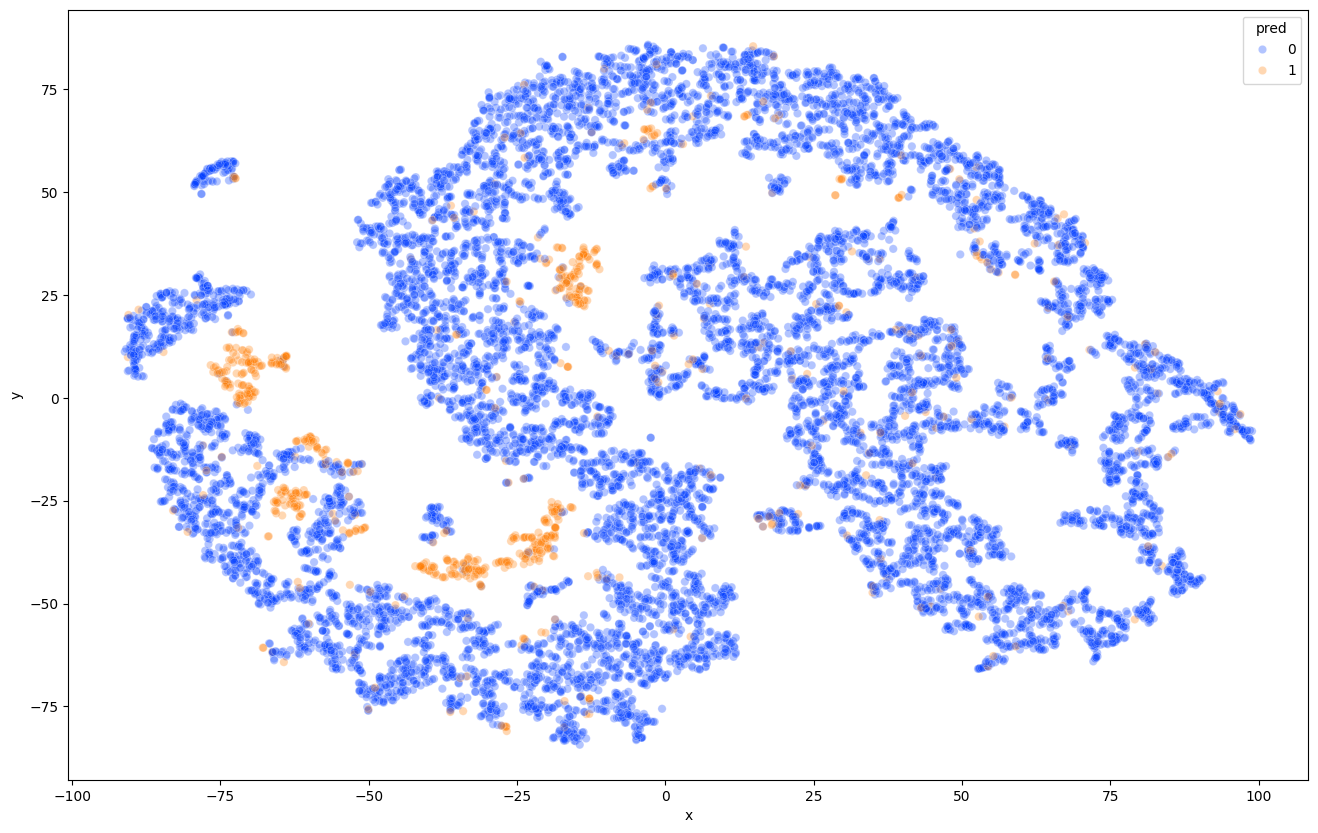

In [100]:
# Plot Ground Truth

# Dimensionality based on USU

labels = g_usu.ndata["label"]
predicted = labels.detach().numpy()

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='x', ylabel='y'>

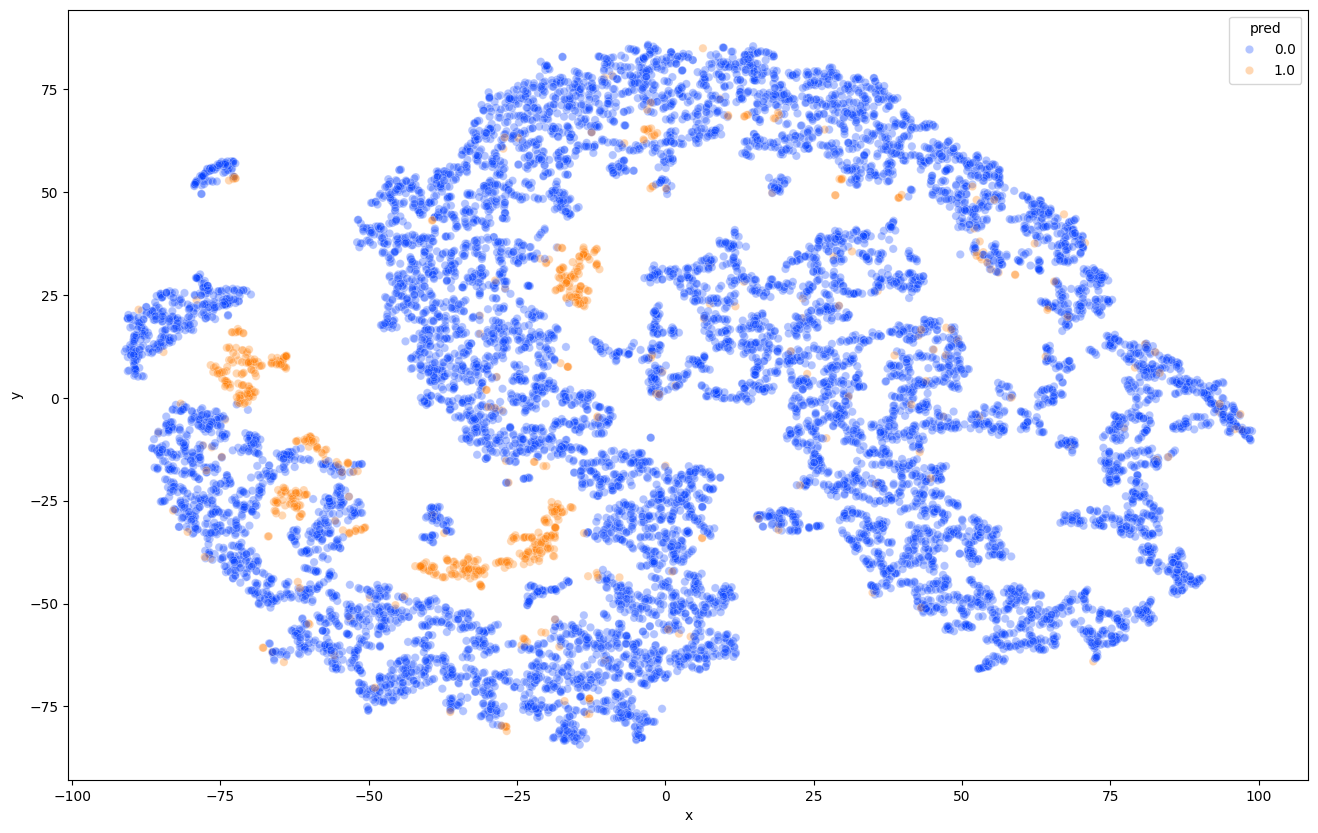

In [101]:
# Plot Insensitive Prediction
predicted = pred_ensemble_insens.detach().numpy()

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='x', ylabel='y'>

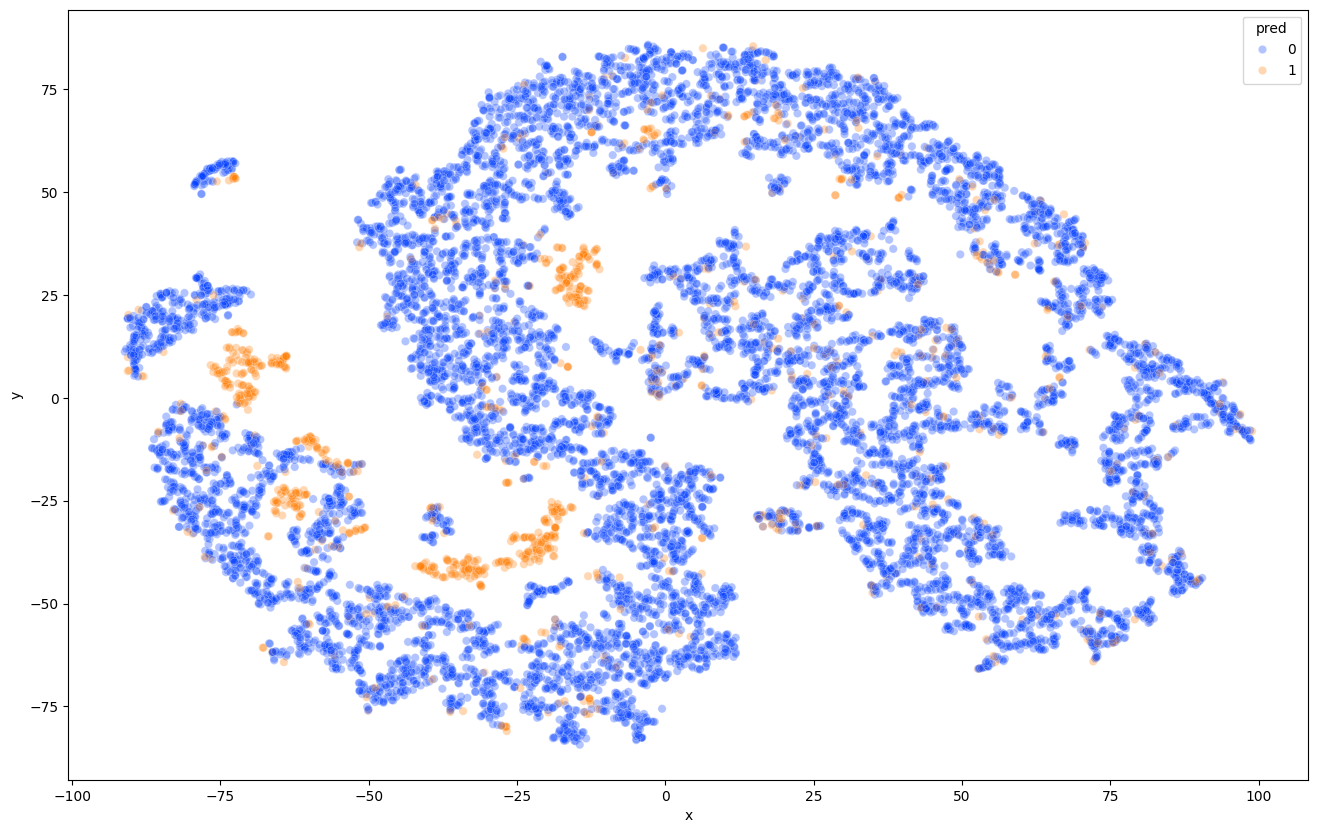

In [102]:
# Plot Sensitive Prediction
predicted = pred_ensemble_sens.detach().numpy()

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='x', ylabel='y'>

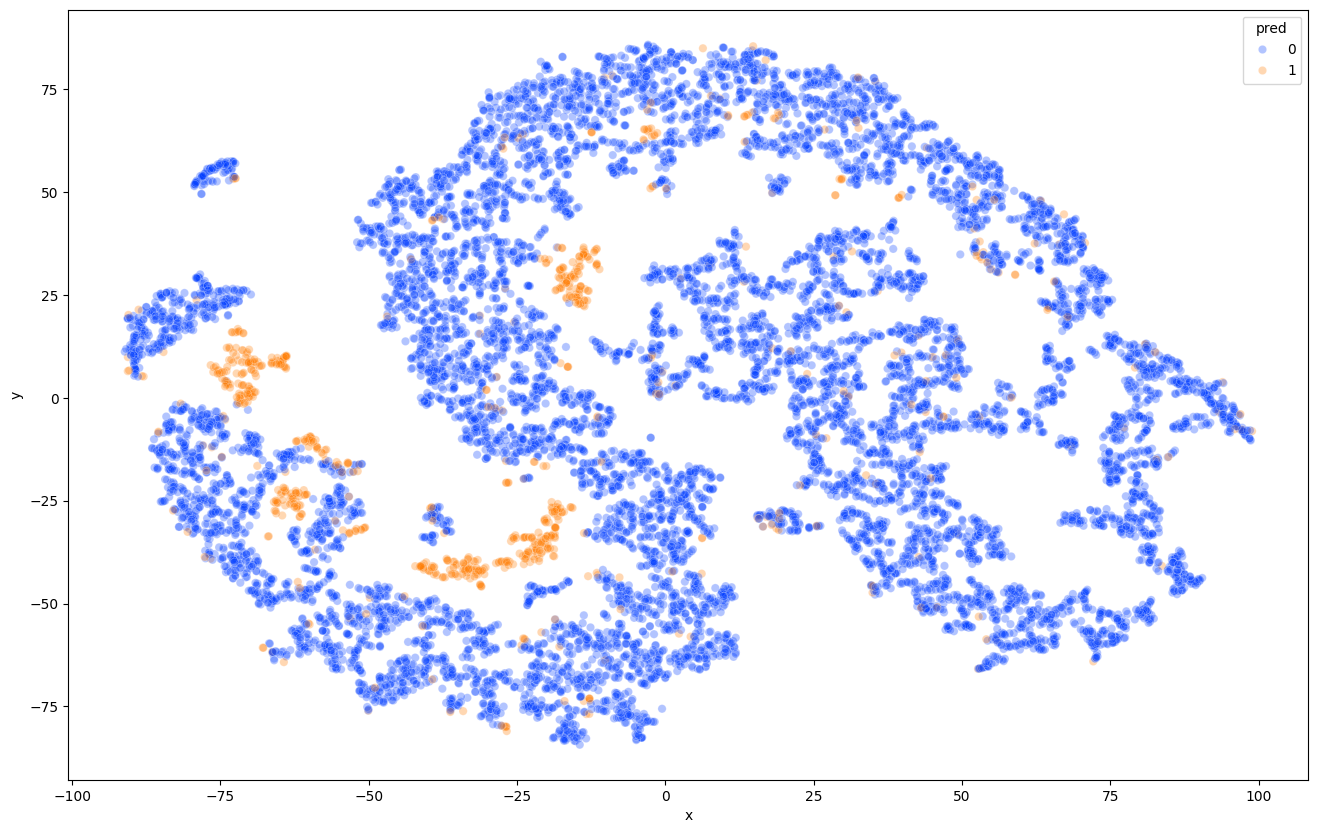

In [103]:
# Plot USU Prediction

# Use USU Data Reduction
predicted = pred_usu.detach().numpy()

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11944 samples in 0.001s...
[t-SNE] Computed neighbors for 11944 samples in 1.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11944
[t-SNE] Computed conditional probabilities for sample 2000 / 11944
[t-SNE] Computed conditional probabilities for sample 3000 / 11944
[t-SNE] Computed conditional probabilities for sample 4000 / 11944
[t-SNE] Computed conditional probabilities for sample 5000 / 11944
[t-SNE] Computed conditional probabilities for sample 6000 / 11944
[t-SNE] Computed conditional probabilities for sample 7000 / 11944
[t-SNE] Computed conditional probabilities for sample 8000 / 11944
[t-SNE] Computed conditional probabilities for sample 9000 / 11944
[t-SNE] Computed conditional probabilities for sample 10000 / 11944
[t-SNE] Computed conditional probabilities for sample 11000 / 11944
[t-SNE] Computed conditional probabilities for sample 11944 / 11944
[t-SNE] Mean sigma: 9.238314
[t-SNE] KL divergence

<Axes: xlabel='x', ylabel='y'>

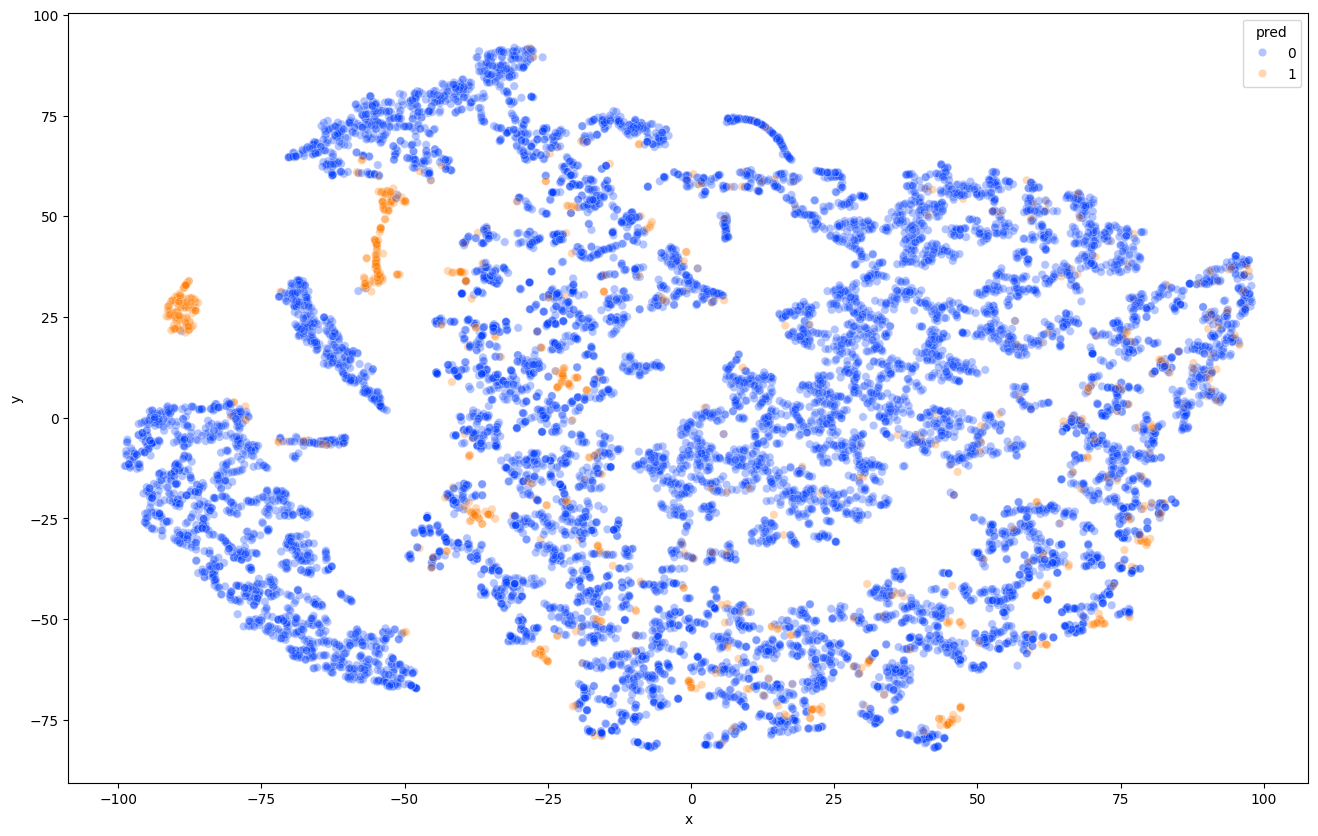

In [104]:
# Plot UPU Prediction

# Create dimension-reduction

# Based on https://builtin.com/data-science/tsne-python
tsne_data = model(g_upu, features).detach().numpy()

tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(model(g_upu, features).detach().numpy())

predicted = pred_upu.detach().numpy()

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11944 samples in 0.001s...
[t-SNE] Computed neighbors for 11944 samples in 1.219s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11944
[t-SNE] Computed conditional probabilities for sample 2000 / 11944
[t-SNE] Computed conditional probabilities for sample 3000 / 11944
[t-SNE] Computed conditional probabilities for sample 4000 / 11944
[t-SNE] Computed conditional probabilities for sample 5000 / 11944
[t-SNE] Computed conditional probabilities for sample 6000 / 11944
[t-SNE] Computed conditional probabilities for sample 7000 / 11944
[t-SNE] Computed conditional probabilities for sample 8000 / 11944
[t-SNE] Computed conditional probabilities for sample 9000 / 11944
[t-SNE] Computed conditional probabilities for sample 10000 / 11944
[t-SNE] Computed conditional probabilities for sample 11000 / 11944
[t-SNE] Computed conditional probabilities for sample 11944 / 11944
[t-SNE] Mean sigma: 22.568819
[t-SNE] KL divergenc

<Axes: xlabel='x', ylabel='y'>

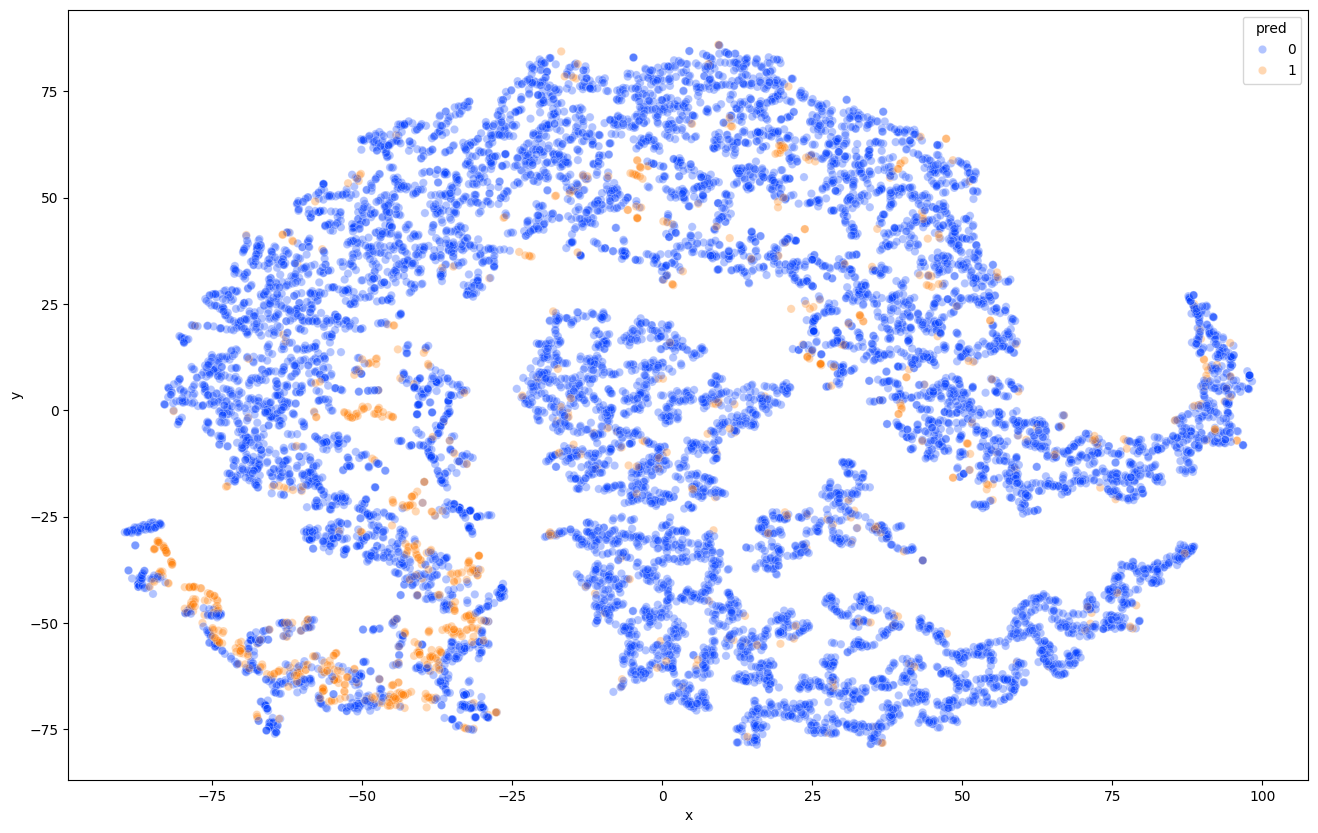

In [105]:
# Plot UVU Prediction

# Create dimension-reduction

# Based on https://builtin.com/data-science/tsne-python
tsne_data = model(g_uvu, features).detach().numpy()

tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(model(g_uvu, features).detach().numpy())

predicted = pred_uvu.detach().numpy()

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

df = pd.DataFrame({'x':tsne_2d_one, 'y':tsne_2d_two, 'pred':predicted})

# Show the df
# df

# Plot labelling using TSNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="pred",
    palette=sns.color_palette("bright", 2),
    data=df,
    legend="full",
    alpha=0.3
)